In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "../data"
features = pd.read_csv(f"{data_dir}/features.csv")
binary_tags = features.iloc[:, 1:].astype(int)

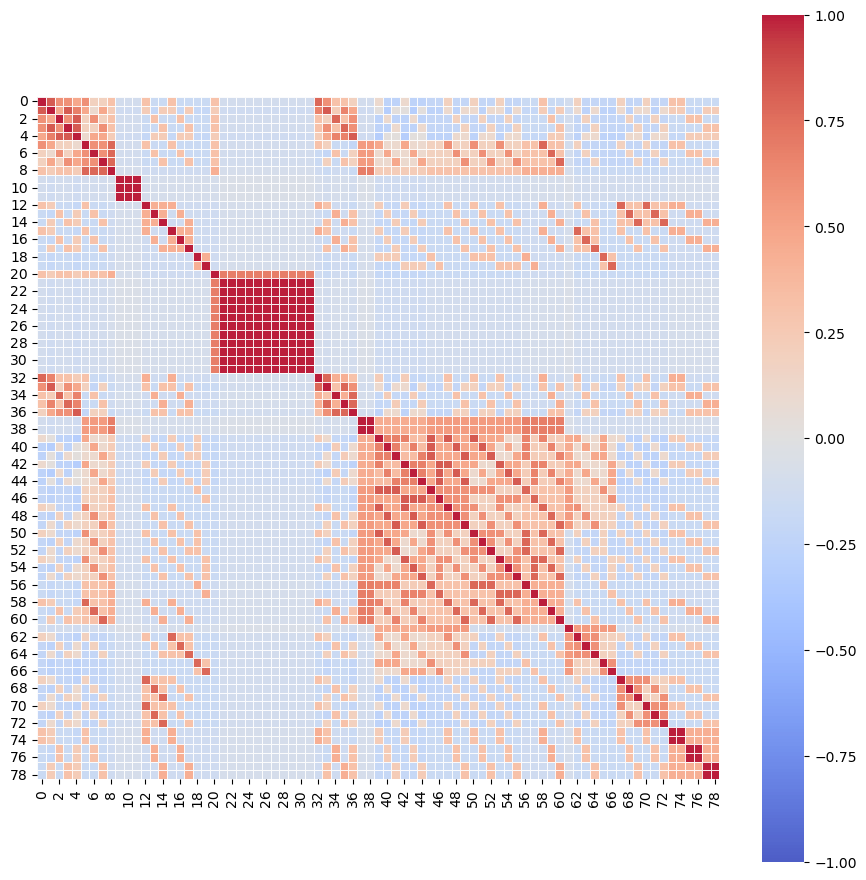

In [3]:
plt.figure(figsize=(11, 11))
correlation_matrix = features[[ f"tag_{no}" for no in range(0,17,1) ]].T.corr()
sns.heatmap(correlation_matrix, square=True, cmap="coolwarm", alpha =0.9, vmin=-1, vmax=1, center= 0, linewidths=0.5, linecolor='white')
plt.show()

In [4]:
to_drop = set()
fullset = set(range(79))
feature_num = len(correlation_matrix)
correlation_threshold = 0.8

# 遍历 correlation matrix，把相关性大于阈值的特征加入到 to_drop 中
for i in range(feature_num):
    for j in range(i+1, feature_num):
        if correlation_matrix.iloc[i, j] > correlation_threshold:
            feature_to_drop = correlation_matrix.columns[j]
            to_drop.add(feature_to_drop)

print(f"Features to drop: {to_drop}")
print(f"Number of features to drop: {len(to_drop)}")

Features to drop: {1, 3, 4, 10, 11, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 36, 38, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 74, 76, 78}
Number of features to drop: 32


In [5]:
fullset = set(range(79))
to_keep = fullset - to_drop
print(f"Features to keep {list(to_keep)}")
all_features = features[[ f"tag_{no}" for no in range(0,17,1)]]
keep_features = all_features.loc(axis=0)[list(to_keep)]

# keep_features = features[[list(to_keep)], :]
print(all_features.shape)
print(keep_features.shape)

Features to keep [0, 2, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 32, 34, 35, 37, 39, 40, 41, 42, 43, 44, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77]
(79, 17)
(47, 17)


In [15]:
keep_features = features.iloc[list(to_keep)]
keep_features.to_csv(f"{data_dir}/features_filtered.csv", index=False)
print(keep_features)

       feature  tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  \
0   feature_00  False  False   True  False  False  False  False  False  False   
2   feature_02  False  False   True  False  False  False  False  False  False   
5   feature_05  False  False  False   True  False  False  False  False  False   
6   feature_06  False  False  False   True  False  False  False  False  False   
7   feature_07  False  False  False   True  False  False  False  False  False   
8   feature_08  False  False  False   True  False  False  False  False  False   
9   feature_09  False   True  False  False  False  False  False  False  False   
12  feature_12  False  False  False  False  False  False  False  False  False   
13  feature_13  False  False  False  False  False  False  False  False  False   
14  feature_14  False  False  False  False  False  False  False  False  False   
15  feature_15  False  False  False  False  False  False   True  False  False   
16  feature_16  False  False

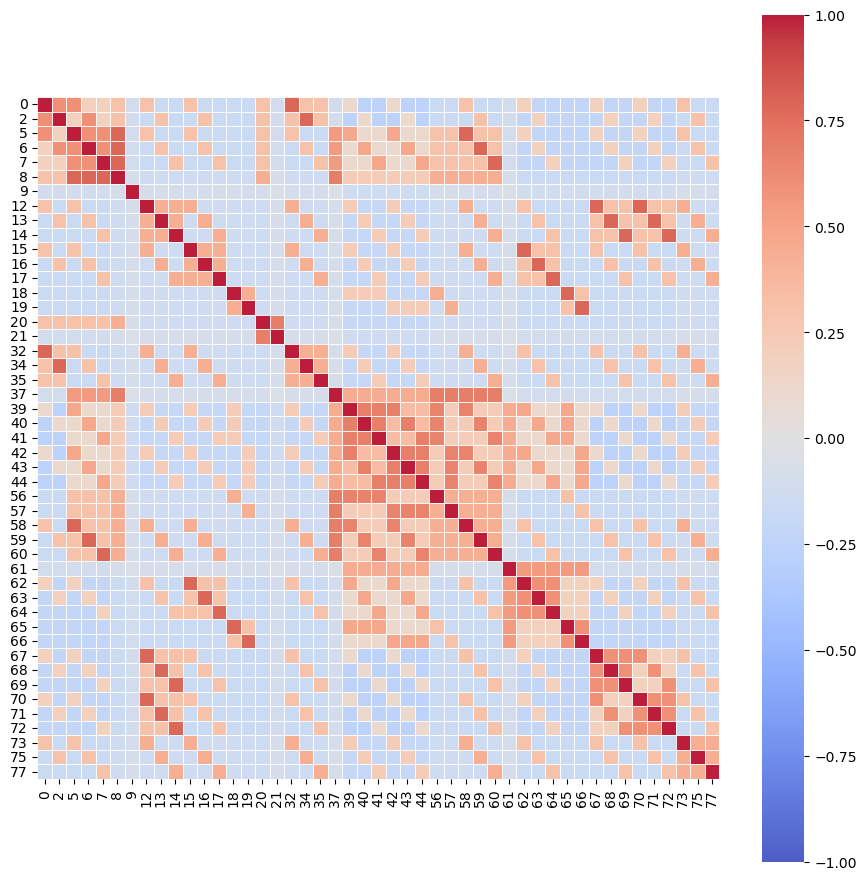

In [6]:
plt.figure(figsize=(11, 11))
correlation_matrix = keep_features[[ f"tag_{no}" for no in range(0,17,1) ]].T.corr()
sns.heatmap(correlation_matrix, square=True, cmap="coolwarm", alpha =0.9, vmin=-1, vmax=1, center= 0, linewidths=0.5, linecolor='white')
plt.show()